# Week 2 Coding Tasks
Start a new Jupyter Notebook to complete these tasks. This week, you'll be combining two different datasets.

First, you'll work with a dataset containing the number of primary care physicians per county for each county in the United States. It was obtained from the Area Health Resources File, published by the [Health Resources and Services Administration](https://data.hrsa.gov/topics/health-workforce/ahrf). This data is contained in the file `primary_care_physicians.csv`.

Second, the file `population_by_county.csv` contains the Census Bureau's 2019 population estimates for each US County. It also contains a column `urban`. The `urban` column uses data from the National Bureau of Economic Research to classify each county as either urban or rural. The U.S. Office of Management and Budget designates counties as metropolitan (a core urban area of 50,000 or more population), micropolitan (an urban core of at least 10,000 but less than 50,000 population), or neither. Here, a county is considered "urban" if it is part of a metropolitan or micropolitan area and "rural" if it is not.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 1. First, import the primary care physicians dataset (`primary_care_physicians.csv`) into a data frame named `physicians`. 

In [2]:
physicians = pd.read_csv("../data/primary_care_physicians.csv")
physicians

,FIPS,state,county,primary_care_physicians
0,1001,Alabama,Autauga,26.0
1,1003,Alabama,Baldwin,153.0
2,1005,Alabama,Barbour,8.0
3,1007,Alabama,Bibb,12.0
4,1009,Alabama,Blount,12.0
...,...,...,...,...
3225,72151,Puerto Rico,Yabucoa,5.0
3226,72153,Puerto Rico,Yauco,43.0
3227,78010,US Virgin Islands,St. Croix,14.0
3228,78020,US Virgin Islands,St. John,1.0


 2. Filter `physicians` down to just the counties in Tennessee. Save the filtered dataframe back to `physicians`. Verify that the resulting dataframe has 95 rows.

In [3]:
physicians.loc[(physicians['state'] == 'Tennessee')]

,FIPS,state,county,primary_care_physicians
2432,47001,Tennessee,Anderson,39.0
2433,47003,Tennessee,Bedford,15.0
2434,47005,Tennessee,Benton,3.0
2435,47007,Tennessee,Bledsoe,1.0
2436,47009,Tennessee,Blount,90.0
...,...,...,...,...
2522,47181,Tennessee,Wayne,5.0
2523,47183,Tennessee,Weakley,18.0
2524,47185,Tennessee,White,9.0
2525,47187,Tennessee,Williamson,338.0


In [4]:
physicians = physicians.loc[(physicians['state'] == 'Tennessee')]

 3. Look at the distribution of the number of primary care physicians. What do you notice?
 number of physicians per country ranges from 0 - 806, with a mean of 51.

In [5]:
physicians['primary_care_physicians'].describe()

count     95.000000
mean      51.042105
std      129.311426
min        0.000000
25%        4.500000
50%       12.000000
75%       26.500000
max      806.000000
Name: primary_care_physicians, dtype: float64

 4. Now, import the population by county dataset (`population_by_county.csv`) into a DataFrame named `population`.

In [6]:
population = pd.read_csv("../data/population_by_county.csv")
population

,FIPS,population,county,state,urban
0,17051,21565,Fayette County,ILLINOIS,Rural
1,17107,29003,Logan County,ILLINOIS,Rural
2,17165,23994,Saline County,ILLINOIS,Rural
3,17097,701473,Lake County,ILLINOIS,Urban
4,17127,14219,Massac County,ILLINOIS,Rural
...,...,...,...,...,...
3197,47033,14399,Crockett County,TENNESSEE,Rural
3198,47095,7401,Lake County,TENNESSEE,Rural
3199,47093,461104,Knox County,TENNESSEE,Urban
3200,53005,197518,Benton County,WASHINGTON,Urban


In [7]:
population['county'] = population['county'].str.replace(' County', '')
population

,FIPS,population,county,state,urban
0,17051,21565,Fayette,ILLINOIS,Rural
1,17107,29003,Logan,ILLINOIS,Rural
2,17165,23994,Saline,ILLINOIS,Rural
3,17097,701473,Lake,ILLINOIS,Urban
4,17127,14219,Massac,ILLINOIS,Rural
...,...,...,...,...,...
3197,47033,14399,Crockett,TENNESSEE,Rural
3198,47095,7401,Lake,TENNESSEE,Rural
3199,47093,461104,Knox,TENNESSEE,Urban
3200,53005,197518,Benton,WASHINGTON,Urban


In [8]:
population = population.loc[(population['state'] == 'TENNESSEE')]
population

,FIPS,population,county,state,urban
283,47165,183437,Sumner,TENNESSEE,Urban
284,47169,10231,Trousdale,TENNESSEE,Urban
285,47027,7654,Clay,TENNESSEE,Rural
405,47157,936374,Shelby,TENNESSEE,Urban
406,47077,27977,Henderson,TENNESSEE,Rural
...,...,...,...,...,...
3195,47123,46064,Monroe,TENNESSEE,Rural
3196,47079,32284,Henry,TENNESSEE,Rural
3197,47033,14399,Crockett,TENNESSEE,Rural
3198,47095,7401,Lake,TENNESSEE,Rural


5. Merge the `physicians` DataFrame with the `population` DataFrame. Keep only the values for Tennessee. When you merge, be sure the include both the `population` and `urban` columns in the merged results. Save the result of the merge back to `physicians`.

In [9]:
pd.merge(left = physicians,
         right = population[['population', 'county', 'urban']])

,FIPS,state,county,primary_care_physicians,population,urban
0,47001,Tennessee,Anderson,39.0,76061,Urban
1,47003,Tennessee,Bedford,15.0,48292,Rural
2,47005,Tennessee,Benton,3.0,16140,Rural
3,47007,Tennessee,Bledsoe,1.0,14836,Rural
4,47009,Tennessee,Blount,90.0,129927,Urban
...,...,...,...,...,...,...
90,47181,Tennessee,Wayne,5.0,16693,Rural
91,47183,Tennessee,Weakley,18.0,33510,Rural
92,47185,Tennessee,White,9.0,26800,Rural
93,47187,Tennessee,Williamson,338.0,225389,Urban


In [10]:
physicians = pd.merge(left = physicians,
         right = population[['population', 'county', 'urban']])
physicians

,FIPS,state,county,primary_care_physicians,population,urban
0,47001,Tennessee,Anderson,39.0,76061,Urban
1,47003,Tennessee,Bedford,15.0,48292,Rural
2,47005,Tennessee,Benton,3.0,16140,Rural
3,47007,Tennessee,Bledsoe,1.0,14836,Rural
4,47009,Tennessee,Blount,90.0,129927,Urban
...,...,...,...,...,...,...
90,47181,Tennessee,Wayne,5.0,16693,Rural
91,47183,Tennessee,Weakley,18.0,33510,Rural
92,47185,Tennessee,White,9.0,26800,Rural
93,47187,Tennessee,Williamson,338.0,225389,Urban


 6. How many Tennessee counties are considered urban?
 38

In [11]:
physicians['urban'].value_counts()

Rural    57
Urban    38
Name: urban, dtype: int64

7. The State Health Access Data Assistance Center (SHADAC) (https://www.shadac.org/) classifies counties into three groups based on the number of residents per primary care physician. First, counties with fewer than 1500 residents per primary care physician are considered to have an "adequate" supply. Counties with at least 1500 residents but fewer than 3500 residents per primary care physician are considered to have a "moderately inadequate" supply, and counties with at least 3500 residents per primary care physician are considered to have a "low inadequate" supply. How many counties in Tennessee are in each group? 
adequate supply = 14 counties
moderate inadequate supply = 50 counties
low inadequate supply = 31 counties

In [12]:
physicians["residents_per_physician"] = physicians["population"] / physicians["primary_care_physicians"]
physicians

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_physician
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333
...,...,...,...,...,...,...,...
90,47181,Tennessee,Wayne,5.0,16693,Rural,3338.600000
91,47183,Tennessee,Weakley,18.0,33510,Rural,1861.666667
92,47185,Tennessee,White,9.0,26800,Rural,2977.777778
93,47187,Tennessee,Williamson,338.0,225389,Urban,666.831361


In [13]:
physicians.loc[(physicians['residents_per_physician'] <= 1500)]

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_physician
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333
12,47025,Tennessee,Claiborne,23.0,31732,Rural,1379.652174
15,47031,Tennessee,Coffee,37.0,55209,Rural,1492.135135
17,47035,Tennessee,Cumberland,40.0,59216,Rural,1480.400000
18,47037,Tennessee,Davidson,665.0,687488,Urban,1033.816541
32,47065,Tennessee,Hamilton,403.0,360919,Urban,895.580645
39,47079,Tennessee,Henry,22.0,32284,Rural,1467.454545
46,47093,Tennessee,Knox,520.0,461104,Urban,886.738462
56,47113,Tennessee,Madison,129.0,97625,Urban,756.782946
70,47141,Tennessee,Putnam,52.0,77447,Rural,1489.365385


In [14]:
physicians.loc[(physicians['residents_per_physician'] <= 1500)].shape

(14, 7)

In [15]:
physicians.loc[(physicians['residents_per_physician'] > 1500) & (physicians['residents_per_physician'] <= 3500)]

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_physician
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667
5,47011,Tennessee,Bradley,55.0,105749,Urban,1922.709091
6,47013,Tennessee,Campbell,19.0,39797,Rural,2094.578947
8,47017,Tennessee,Carroll,12.0,27886,Rural,2323.833333
9,47019,Tennessee,Carter,22.0,56433,Urban,2565.136364
10,47021,Tennessee,Cheatham,23.0,40181,Urban,1747.000000
14,47029,Tennessee,Cocke,16.0,35552,Rural,2222.000000
19,47039,Tennessee,Decatur,4.0,11686,Rural,2921.500000
20,47041,Tennessee,DeKalb,9.0,19847,Rural,2205.222222


In [16]:
physicians.loc[(physicians['residents_per_physician'] > 1500) & (physicians['residents_per_physician'] <= 3500)].shape

(50, 7)

In [17]:
physicians.loc[(physicians['residents_per_physician'] > 3500)]

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_physician
2,47005,Tennessee,Benton,3.0,16140,Rural,5.380000e+03
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,1.483600e+04
7,47015,Tennessee,Cannon,3.0,14178,Urban,4.726000e+03
11,47023,Tennessee,Chester,4.0,17190,Urban,4.297500e+03
13,47027,Tennessee,Clay,2.0,7654,Rural,3.827000e+03
16,47033,Tennessee,Crockett,0.0,14399,Rural,inf
28,47057,Tennessee,Grainger,5.0,23101,Urban,4.620200e+03
30,47061,Tennessee,Grundy,0.0,13344,Rural,inf
33,47067,Tennessee,Hancock,1.0,6587,Rural,6.587000e+03
34,47069,Tennessee,Hardeman,4.0,25443,Rural,6.360750e+03


In [18]:
physicians.loc[(physicians['residents_per_physician'] > 3500)].shape

(31, 7)

In [19]:
# create a list of our conditions
conditions = [
    (physicians['residents_per_physician'] <= 1500),
    (physicians['residents_per_physician'] > 1500) & (physicians['residents_per_physician'] <= 3000),
    (physicians['residents_per_physician'] > 3000)
    ]


In [20]:
# create a list of the values we want to assign for each condition
values = ['adequate', 'mod_inadequate', 'low_inadequate']

In [21]:
# create a new column and use np.select to assign values to it using our lists as arguments
physicians['shadac_category'] = np.select(conditions, values)
physicians

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_physician,shadac_category
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,mod_inadequate
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,low_inadequate
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low_inadequate
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low_inadequate
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate
...,...,...,...,...,...,...,...,...
90,47181,Tennessee,Wayne,5.0,16693,Rural,3338.600000,low_inadequate
91,47183,Tennessee,Weakley,18.0,33510,Rural,1861.666667,mod_inadequate
92,47185,Tennessee,White,9.0,26800,Rural,2977.777778,mod_inadequate
93,47187,Tennessee,Williamson,338.0,225389,Urban,666.831361,adequate


8. Does there appear to be any detectable relationship between whether a county is urban or rural and its supply of primary care physicians?
urban areas seem to have proportionately more adequate supply of physicians.

In [22]:
physicians.groupby(['urban', 'shadac_category']).size()

urban  shadac_category
Rural  adequate            5
       low_inadequate     23
       mod_inadequate     29
Urban  adequate            9
       low_inadequate     11
       mod_inadequate     18
dtype: int64

# Week 3 Coding Tasks
1. First, (if you haven't done so already), create a new column indicating the SHADAC classification for each Tennessee county. You can use the following code to accomplish this:
```
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
          (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'
```

2. Use this new column to investigate if there is any relationship between a county's status as urban or rural and its SHADAC classification. Create a plot showing what you find.

In [23]:
pd.crosstab(physicians['urban'], physicians['shadac_category'])

shadac_category,adequate,low_inadequate,mod_inadequate
urban,,,
Rural,5,23,29
Urban,9,11,18


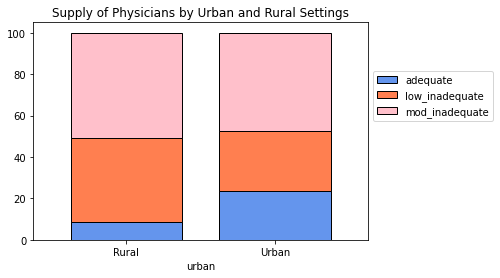

In [27]:
(pd.crosstab(physicians['urban'], physicians['shadac_category'],  normalize = 'index') * 100).plot(kind = 'bar', 
                                                                                        stacked = True,
                                                                                        color = ['cornflowerblue', 'coral', 'pink'],
                                                                                        edgecolor = 'black',
                                                                                        width = 0.75,
                                                                                       )
plt.title('Supply of Physicians by Urban and Rural Settings')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left');

3. Merge the unemployment data (contained in tn_unemployment.csv) into the physicians DataFrame.

In [29]:
unemployment = pd.read_csv("../data/tn_unemployment.csv")
unemployment

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,"Benton County, TN",Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,"Bledsoe County, TN",Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,"Blount County, TN",Mar-21,64098,61119,2979,4.6
...,...,...,...,...,...,...,...,...,...
90,CN4718100000000,47,181,"Wayne County, TN",Mar-21,6416,6074,342,5.3
91,CN4718300000000,47,183,"Weakley County, TN",Mar-21,15494,14783,711,4.6
92,CN4718500000000,47,185,"White County, TN",Mar-21,12085,11484,601,5.0
93,CN4718700000000,47,187,"Williamson County, TN",Mar-21,129484,125213,4271,3.3


In [32]:
unemployment['county'] = unemployment['Name'].str.replace(' County, TN', '')
unemployment

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate,county
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9,Anderson
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2,Bedford
2,CN4700500000000,47,5,"Benton County, TN",Mar-21,6723,6305,418,6.2,Benton
3,CN4700700000000,47,7,"Bledsoe County, TN",Mar-21,4252,3947,305,7.2,Bledsoe
4,CN4700900000000,47,9,"Blount County, TN",Mar-21,64098,61119,2979,4.6,Blount
...,...,...,...,...,...,...,...,...,...,...
90,CN4718100000000,47,181,"Wayne County, TN",Mar-21,6416,6074,342,5.3,Wayne
91,CN4718300000000,47,183,"Weakley County, TN",Mar-21,15494,14783,711,4.6,Weakley
92,CN4718500000000,47,185,"White County, TN",Mar-21,12085,11484,601,5.0,White
93,CN4718700000000,47,187,"Williamson County, TN",Mar-21,129484,125213,4271,3.3,Williamson


In [39]:
physicians = pd.merge(left = physicians,
         right = unemployment[['LF', 'county', 'Employed', "Unemployed", "unemployment_rate"]])
physicians

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_physician,shadac_category,LF,Employed,Unemployed,unemployment_rate
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,mod_inadequate,34704,33010,1694,4.9
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,low_inadequate,20623,19550,1073,5.2
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low_inadequate,6723,6305,418,6.2
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low_inadequate,4252,3947,305,7.2
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,64098,61119,2979,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...
90,47181,Tennessee,Wayne,5.0,16693,Rural,3338.600000,low_inadequate,6416,6074,342,5.3
91,47183,Tennessee,Weakley,18.0,33510,Rural,1861.666667,mod_inadequate,15494,14783,711,4.6
92,47185,Tennessee,White,9.0,26800,Rural,2977.777778,mod_inadequate,12085,11484,601,5.0
93,47187,Tennessee,Williamson,338.0,225389,Urban,666.831361,adequate,129484,125213,4271,3.3


4. How do unemployment rates compare for urban counties versus rural counties?

In [36]:
physicians.groupby('urban')['unemployment_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
urban,,,,,,,,
Rural,57.0,5.850877,0.976349,3.7,5.200,5.60,6.500,9.3
Urban,38.0,4.918421,0.759749,3.3,4.325,4.85,5.375,7.1


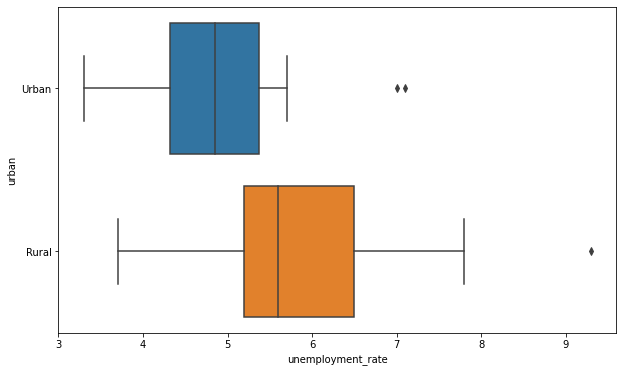

In [38]:
plt.figure(figsize = (10,6))

sns.boxplot(data = physicians,
           x = 'unemployment_rate',
           y = 'urban');

5. Create a new column, `pcp_per_100k` which contains the number of primary care physicians per 100,000 residents. Investigate the relationship between this new measure and the unemployment rate per county. What do you find?

In [42]:
physicians['pcp_per_100k'] = physicians['primary_care_physicians'] / physicians['population'] * 100000
physicians

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_physician,shadac_category,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,mod_inadequate,34704,33010,1694,4.9,51.274635
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,low_inadequate,20623,19550,1073,5.2,31.061045
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low_inadequate,6723,6305,418,6.2,18.587361
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low_inadequate,4252,3947,305,7.2,6.740361
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,64098,61119,2979,4.6,69.269667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,47181,Tennessee,Wayne,5.0,16693,Rural,3338.600000,low_inadequate,6416,6074,342,5.3,29.952675
91,47183,Tennessee,Weakley,18.0,33510,Rural,1861.666667,mod_inadequate,15494,14783,711,4.6,53.715309
92,47185,Tennessee,White,9.0,26800,Rural,2977.777778,mod_inadequate,12085,11484,601,5.0,33.582090
93,47187,Tennessee,Williamson,338.0,225389,Urban,666.831361,adequate,129484,125213,4271,3.3,149.962953


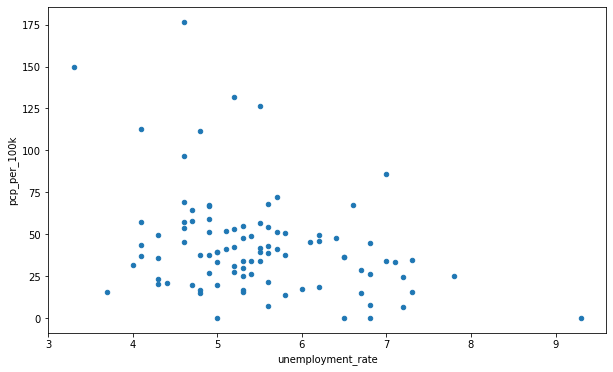

In [45]:
physicians.plot(kind = 'scatter',
             x = 'unemployment_rate',
             y = 'pcp_per_100k',
             figsize = (10,6));

In [44]:
physicians[['unemployment_rate', 'pcp_per_100k']].corr()

,unemployment_rate,pcp_per_100k
unemployment_rate,1.000000,-0.335333
pcp_per_100k,-0.335333,1.000000
